In [1]:
from corpus import Corpus
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
corpus = Corpus.from_file('data/train.json')

In [3]:
corpus.build_vectors()
corpus.build_np_vecs()

In [12]:
np.random.seed(78)
limit = 6000
category_docs = [[] for _ in range(4)]
for i, doc in enumerate(corpus.docs[:limit]):
    category_docs[doc.int_category].append(i)
chosen_ones = []
real_labels = []
for i in range(4):
    chosen_ones.append(np.random.choice(category_docs[i], 100, replace=False))
chosen_ones = np.array(chosen_ones, dtype=np.int)
all_chosen_ones = chosen_ones.reshape((-1))
print(all_chosen_ones)
real_labels = np.array([doc.int_category for doc in corpus.docs[:limit]], dtype=np.int)
print(real_labels)

[3621 5976 5933 5591 2921  382 1081 4879 5999  875 3287 2388 2452 4030
 2548 4374 4301 5852 2694 4078 3468 4449 4982 1472 5027 4753 1664 4519
 4021 5130  386 4531 3000 5847 1336 5680 1542 1399 2212 4746  579   92
  645 3098 1307 4097 1379 1437 3400 3013 1497  988 4475 4706 2406 1324
  828 5416 4996  649 5640 3547 4127 1289 5323  433 3557 4058 5634 3242
 3259 2033  661  573 2094 5375 1703  731 5697 1621 5932  236 5082 2326
  813 3290 3891 3600  230  835  267 1449 5866 4387 2532 4343 2732 2979
 1479 3055 4539 3602 5089 4752  509 3650 1492 5280 2268 4990 4268 4026
 4548 3536 3344 2940 3329 1858 1491 1421 1996 4245 4971 5953  796 2074
 1070 1992 3322 3363 5602 5645 2340 3898  674 1495  390 1229  491 2218
 4504   50 4284 3437 3737 4797 1631 3880 4286 1117 1278 5743  205 5828
 1693 2564 4038 4709 5460 5165 4204  735 5513 5135 4839 5452 3849  600
  952 4914 1121 4561 1410 5232 2606 3668  841  277  327 1543 1685 3381
 4719 4052 3755 4261   34 5202 4987 2788 4307 5181 1524 4165 2350   17
 4220 

In [13]:
from kmeans import Kmeans, Shower

In [14]:
def evaluate_vectors(vecs, limit, verbose=True):
    kmeans = Kmeans()
    kmeans.set_vectors(vecs[:limit])
    kmeans.set_random_centers(seed=1)

    shower = Shower()
    shower.set_vectors(vecs)
    shower.set_indexes(all_chosen_ones)
    t0 = time()
    shower.fit()
    t1 = time()
    print("fitting time: ", t1 - t0)
    for i in range(100):
        t0 = time()
        if verbose and i % 10 == 0:
            shower.set_labels(kmeans.labels)
            shower.plot()
            plt.show()
            shower.set_labels(real_labels)
            shower.plot()
            plt.show()

        old_cost = kmeans.cost_function
        kmeans.one_iter()
        diff = kmeans.cost_function - old_cost
        t1 = time()

        print("itreation ", i, "diff = ", diff, "time = ", t1 - t0)
        if abs(diff) < 0.001:
            break
    print("final result: ")
    shower.set_labels(kmeans.labels)
    shower.plot()
    plt.show()
    shower.set_labels(real_labels)
    shower.plot()
    plt.show()

fitting time:  20.485374927520752


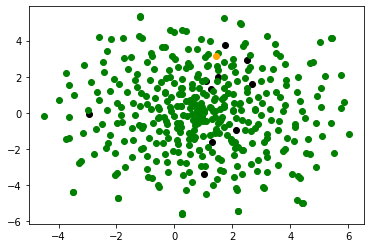

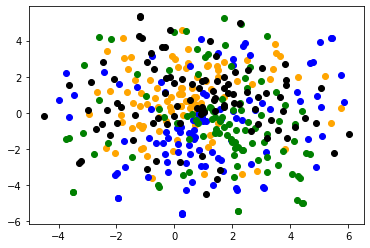

itreation  0 diff =  -6450964.942955657 time =  22.854143142700195
itreation  1 diff =  -996.5921276053414 time =  18.98613214492798
itreation  2 diff =  -294.4542180430144 time =  17.329667806625366
itreation  3 diff =  -54.34119596146047 time =  17.640126943588257
itreation  4 diff =  0.0 time =  16.93322515487671
final result: 


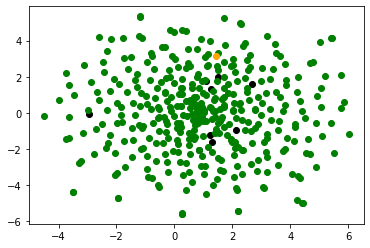

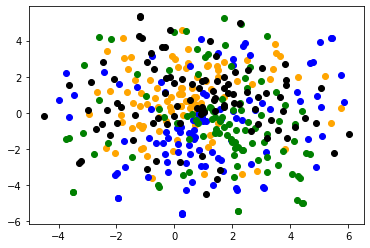

In [15]:
evaluate_vectors(corpus.np_vecs, limit=limit)

# Word2vec

In [8]:
from corpus import Corpus
import numpy as np
import matplotlib.pyplot as plt
from time import time
import gensim.models

In [9]:
corpus = Corpus.from_file('data/train.json')

In [10]:
def one_doc_to_vec(doc, model):
    return np.array(list(map(lambda i: model.wv[corpus.num_to_word[i]], doc.word_iterator))).mean(axis=0)

50 3
+++++++++++++++++++++++++
fitting time:  4.268692970275879
itreation  0 diff =  -13398.41 time =  0.0038290023803710938
itreation  1 diff =  -1564.4766 time =  0.003599882125854492
itreation  2 diff =  -615.0547 time =  0.003489971160888672
itreation  3 diff =  -169.4336 time =  0.003554821014404297
itreation  4 diff =  -38.132812 time =  0.0034890174865722656
itreation  5 diff =  -11.009766 time =  0.0035419464111328125
itreation  6 diff =  -3.1269531 time =  0.0035409927368164062
itreation  7 diff =  -1.6757812 time =  0.00347900390625
itreation  8 diff =  -0.9296875 time =  0.0036458969116210938
itreation  9 diff =  -0.6152344 time =  0.0035109519958496094
itreation  10 diff =  -0.53515625 time =  0.0035359859466552734
itreation  11 diff =  -0.29492188 time =  0.0035562515258789062
itreation  12 diff =  -0.1171875 time =  0.003548860549926758
itreation  13 diff =  -0.0546875 time =  0.003384828567504883
itreation  14 diff =  0.0 time =  0.003537893295288086
final result: 


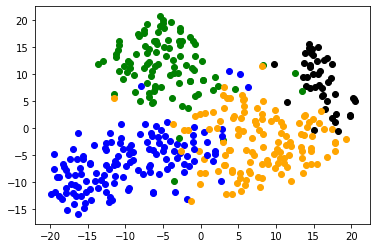

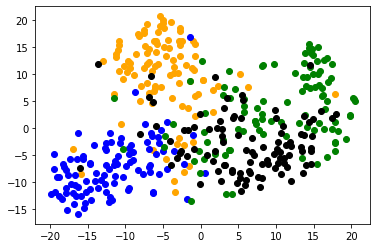

-------------------------

50 5
+++++++++++++++++++++++++
fitting time:  4.104652166366577
itreation  0 diff =  -20050.865 time =  0.003220081329345703
itreation  1 diff =  -2889.9336 time =  0.003664255142211914
itreation  2 diff =  -1609.7344 time =  0.003698110580444336
itreation  3 diff =  -171.61133 time =  0.003606081008911133
itreation  4 diff =  -36.546875 time =  0.0035409927368164062
itreation  5 diff =  -13.472656 time =  0.0034873485565185547
itreation  6 diff =  -6.8828125 time =  0.003834247589111328
itreation  7 diff =  -3.8398438 time =  0.0036551952362060547
itreation  8 diff =  -1.765625 time =  0.0037779808044433594
itreation  9 diff =  -1.1601562 time =  0.0037069320678710938
itreation  10 diff =  -0.7734375 time =  0.0035409927368164062
itreation  11 diff =  -0.37695312 time =  0.0036492347717285156
itreation  12 diff =  -0.10546875 time =  0.003607034683227539
itreation  13 diff =  -0.119140625 time =  0.003467082977294922
itreation  14 diff =  -0.048828125 time =

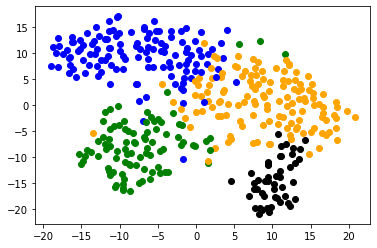

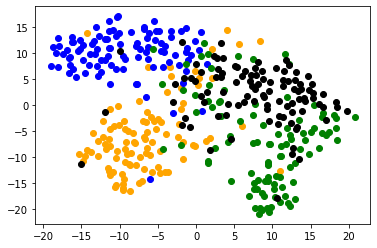

-------------------------

50 7
+++++++++++++++++++++++++
fitting time:  3.538666009902954
itreation  0 diff =  -25949.633 time =  0.002925872802734375
itreation  1 diff =  -3885.1406 time =  0.00347900390625
itreation  2 diff =  -2701.8047 time =  0.003348827362060547
itreation  3 diff =  -278.125 time =  0.0035779476165771484
itreation  4 diff =  -38.367188 time =  0.003579854965209961
itreation  5 diff =  -13.996094 time =  0.003604888916015625
itreation  6 diff =  -3.21875 time =  0.003387928009033203
itreation  7 diff =  -1.3125 time =  0.0037691593170166016
itreation  8 diff =  -1.3164062 time =  0.0036389827728271484
itreation  9 diff =  -0.53125 time =  0.003451108932495117
itreation  10 diff =  -0.30859375 time =  0.003631114959716797
itreation  11 diff =  -0.12890625 time =  0.0036191940307617188
itreation  12 diff =  -0.16796875 time =  0.0042819976806640625
itreation  13 diff =  -0.32421875 time =  0.003787994384765625
itreation  14 diff =  -0.3125 time =  0.003508090972900

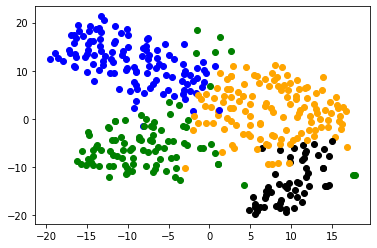

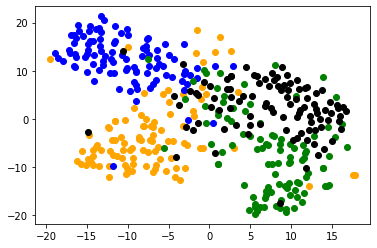

-------------------------

100 3
+++++++++++++++++++++++++
fitting time:  4.663510084152222
itreation  0 diff =  -13664.084 time =  0.0072939395904541016
itreation  1 diff =  -1491.1836 time =  0.0049707889556884766
itreation  2 diff =  -684.0332 time =  0.005349874496459961
itreation  3 diff =  -240.65039 time =  0.005410194396972656
itreation  4 diff =  -60.71289 time =  0.005056858062744141
itreation  5 diff =  -15.4140625 time =  0.004830121994018555
itreation  6 diff =  -5.0039062 time =  0.0051059722900390625
itreation  7 diff =  -1.6152344 time =  0.005095005035400391
itreation  8 diff =  -0.7597656 time =  0.004961967468261719
itreation  9 diff =  -0.31640625 time =  0.0047991275787353516
itreation  10 diff =  -0.3359375 time =  0.005439043045043945
itreation  11 diff =  -0.3046875 time =  0.005095243453979492
itreation  12 diff =  -0.095703125 time =  0.005048036575317383
itreation  13 diff =  -0.07421875 time =  0.005024909973144531
itreation  14 diff =  -0.064453125 time =  

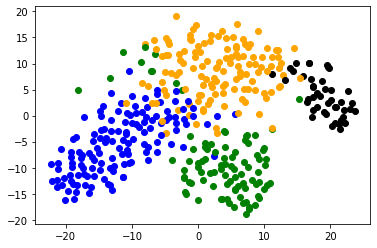

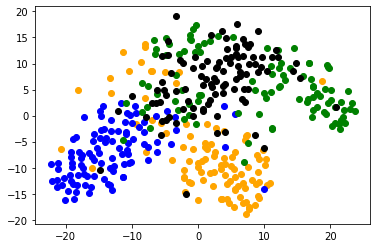

-------------------------

100 5
+++++++++++++++++++++++++
fitting time:  9.115933895111084
itreation  0 diff =  -21326.781 time =  0.007192134857177734
itreation  1 diff =  -2946.7559 time =  0.004762172698974609
itreation  2 diff =  -1503.7949 time =  0.004760026931762695
itreation  3 diff =  -153.66406 time =  0.0049152374267578125
itreation  4 diff =  -38.253906 time =  0.004803657531738281
itreation  5 diff =  -11.050781 time =  0.004832029342651367
itreation  6 diff =  -3.4140625 time =  0.005051851272583008
itreation  7 diff =  -1.3554688 time =  0.004888772964477539
itreation  8 diff =  -0.45703125 time =  0.0048410892486572266
itreation  9 diff =  -0.140625 time =  0.004850864410400391
itreation  10 diff =  -0.005859375 time =  0.004893064498901367
itreation  11 diff =  0.0 time =  0.004881143569946289
final result: 


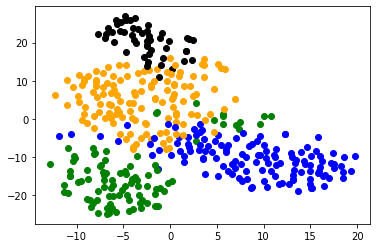

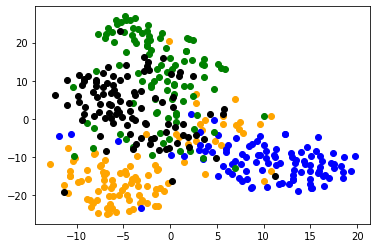

-------------------------

100 7
+++++++++++++++++++++++++
fitting time:  4.480898141860962
itreation  0 diff =  -27724.309 time =  0.007920026779174805
itreation  1 diff =  -3786.75 time =  0.006501197814941406
itreation  2 diff =  -2359.6719 time =  0.005868673324584961
itreation  3 diff =  -460.26172 time =  0.0053441524505615234
itreation  4 diff =  -62.179688 time =  0.007321834564208984
itreation  5 diff =  -16.6875 time =  0.005185842514038086
itreation  6 diff =  -4.234375 time =  0.008317232131958008
itreation  7 diff =  -1.4921875 time =  0.00561213493347168
itreation  8 diff =  -0.9765625 time =  0.005087137222290039
itreation  9 diff =  -0.6875 time =  0.005911111831665039
itreation  10 diff =  -0.2578125 time =  0.0049359798431396484
itreation  11 diff =  -0.3125 time =  0.0059490203857421875
itreation  12 diff =  -0.4375 time =  0.005001068115234375
itreation  13 diff =  -0.1953125 time =  0.0050868988037109375
itreation  14 diff =  -0.0859375 time =  0.004935979843139648

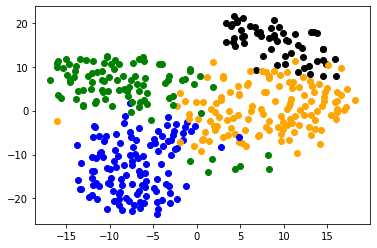

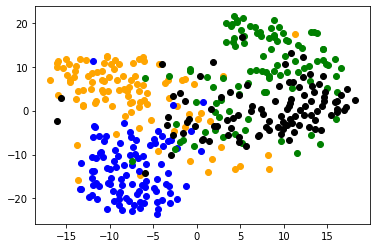

-------------------------

300 3
+++++++++++++++++++++++++
fitting time:  3.5810537338256836
itreation  0 diff =  -14182.482 time =  0.028728961944580078
itreation  1 diff =  -1507.6602 time =  0.013756990432739258
itreation  2 diff =  -701.28906 time =  0.021724700927734375
itreation  3 diff =  -196.89258 time =  0.019414186477661133
itreation  4 diff =  -50.08008 time =  0.018424034118652344
itreation  5 diff =  -13.177734 time =  0.025120973587036133
itreation  6 diff =  -3.2695312 time =  0.01906418800354004
itreation  7 diff =  -1.8613281 time =  0.014966011047363281
itreation  8 diff =  -0.45898438 time =  0.01802206039428711
itreation  9 diff =  -0.2890625 time =  0.014441967010498047
itreation  10 diff =  -0.14453125 time =  0.018581867218017578
itreation  11 diff =  -0.171875 time =  0.015982866287231445
itreation  12 diff =  -0.046875 time =  0.01681375503540039
itreation  13 diff =  -0.03515625 time =  0.013279914855957031
itreation  14 diff =  -0.013671875 time =  0.0159130

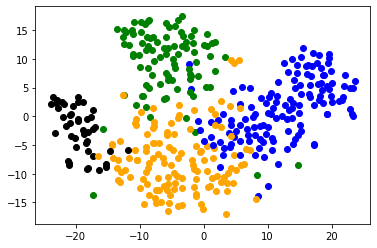

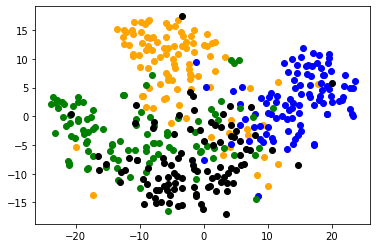

-------------------------

300 5
+++++++++++++++++++++++++
fitting time:  2.9103689193725586
itreation  0 diff =  -20326.195 time =  0.018505096435546875
itreation  1 diff =  -2822.6523 time =  0.011447906494140625
itreation  2 diff =  -1533.8203 time =  0.011001110076904297
itreation  3 diff =  -163.51758 time =  0.010894060134887695
itreation  4 diff =  -30.52539 time =  0.010893106460571289
itreation  5 diff =  -7.8671875 time =  0.011368036270141602
itreation  6 diff =  -3.53125 time =  0.011165857315063477
itreation  7 diff =  -1.5664062 time =  0.01096796989440918
itreation  8 diff =  -0.5078125 time =  0.01279306411743164
itreation  9 diff =  -0.26953125 time =  0.011060953140258789
itreation  10 diff =  -0.09765625 time =  0.010653018951416016
itreation  11 diff =  -0.07421875 time =  0.010764837265014648
itreation  12 diff =  -0.02734375 time =  0.010878801345825195
itreation  13 diff =  -0.01953125 time =  0.011208057403564453
itreation  14 diff =  -0.02734375 time =  0.01066

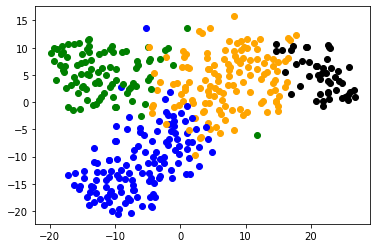

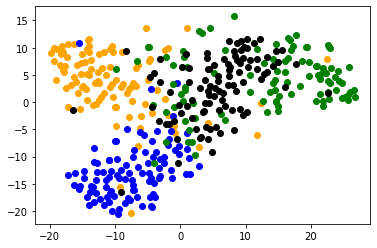

-------------------------

300 7
+++++++++++++++++++++++++
fitting time:  4.342307090759277
itreation  0 diff =  -27245.266 time =  0.021329879760742188
itreation  1 diff =  -3764.8594 time =  0.011597156524658203
itreation  2 diff =  -2395.9336 time =  0.011409759521484375
itreation  3 diff =  -398.2539 time =  0.010938882827758789
itreation  4 diff =  -61.45703 time =  0.010673761367797852
itreation  5 diff =  -16.402344 time =  0.011551856994628906
itreation  6 diff =  -4.90625 time =  0.010669231414794922
itreation  7 diff =  -1.4921875 time =  0.010938882827758789
itreation  8 diff =  -0.53515625 time =  0.011735200881958008
itreation  9 diff =  -0.23828125 time =  0.011123180389404297
itreation  10 diff =  -0.0625 time =  0.011286020278930664
itreation  11 diff =  -0.0078125 time =  0.011124849319458008
itreation  12 diff =  0.0 time =  0.01203298568725586
final result: 


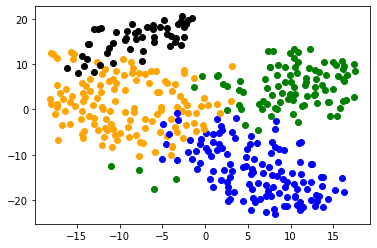

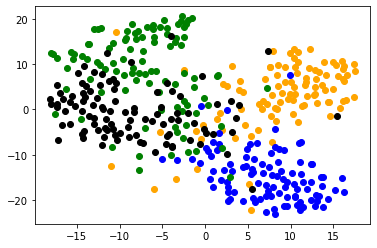

-------------------------



In [15]:
sentences = corpus
window_sizes = [3, 5, 7]
dims = [50, 100, 300]
# window_sizes = [5]
# dims = [100]
for dim in dims:
    for window in window_sizes:
        print(dim, window)
        print('+++++++++++++++++++++++++')
#         model = gensim.models.Word2Vec(sentences=sentences, min_count=1, window=window, size=dim)
        model = gensim.models.Word2Vec(min_count=1, window=window, size=dim)
        model.build_vocab(sentences)
        model.train(sentences, total_examples=model.corpus_count, epochs=10)
        new_vecs = np.array(list(map(lambda x: one_doc_to_vec(x, model), corpus.docs)))
        evaluate_vectors(new_vecs, limit=6000, verbose=False)
        print('-------------------------\n')

دقت کنید که در تمامی بخش‌ها شکل اول مربوط به الگوریتم کی‌مینز
و شکل دوم مربوط به دسته‌بندی اصلی داده‌هاست

همانطور که از اشکال مشخص است، عملا در تمامی حالات داده‌ها به مراتب بهتر از بردار‌هایی که در بخش ۱ ساختیم جدا می‌شوند.
اگر بخواهیم به شکل چشمی قضاوت کنیم، نزدیک‌ترین دسته‌ها در صورتی که با استفاده از کلاس‌های واقعی
دسته‌بندی کنیم، رنگ‌های سیاه و سبز در اشکال هستند. بقیه رنگ‌ها در حالت کلی بهتر جدا شده‌اند.
با توجه به این که این دو رنگ در حالتی که طول پنچره ۷ است و بعد فضا ۵۰ است به بهترین شکل جدا شده است، می‌توان این هایپرپارامتر را بهترین در نظر گرفت